In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [2]:
data.isna().sum()

ConvertedCompYearly         0
Age                         8
YearsCode                  11
YearsCodePro               20
Country                     0
EdLevel                     0
DevType                     4
Employment                  0
LanguageHaveWorkedWith      0
DatabaseHaveWorkedWith      0
PlatformHaveWorkedWith      0
WebframeHaveWorkedWith      0
ToolsTechHaveWorkedWith     0
dtype: int64

In [3]:
data['YearsCodePro'] = data['YearsCodePro'].str.extract(r'(\d+)') 
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')  
max(data['YearsCodePro'])

50.0

In [4]:
# Shuffle các hàng trong DataFrame
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
len(data[data['YearsCodePro'].isna()])


20

In [7]:
data = data.dropna(subset=['YearsCodePro'])

In [8]:
data[data['EdLevel'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [9]:
data[data['Country'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [10]:
data[data['Employment'].isna()]

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith


In [11]:
data.dtypes

ConvertedCompYearly        float64
Age                         object
YearsCode                   object
YearsCodePro               float64
Country                     object
EdLevel                     object
DevType                     object
Employment                  object
LanguageHaveWorkedWith      object
DatabaseHaveWorkedWith      object
PlatformHaveWorkedWith      object
WebframeHaveWorkedWith      object
ToolsTechHaveWorkedWith     object
dtype: object

In [12]:
import re

def extract_average_age(age_str):
    if isinstance(age_str, str):
        match = re.match(r'(\d+)-(\d+)', age_str)
        if match:
            lower, upper = map(int, match.groups())
            if ((lower + upper)/2) %2==0 :
                return ((lower + upper) / 2)
            else:
                return (lower+upper)/2+0.5
    return None 

data['Age'] = data['Age'].apply(extract_average_age)


In [13]:
data = data.dropna() #về sau sửa đoạn này

In [14]:
data['YearsCode'] = data['YearsCode'].str.extract(r'(\d+)') 
data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')  

Vẽ biểu đồ và phân tích

In [15]:
data

,ConvertedCompYearly,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end",Employed full-time,"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],"['Flask', 'jQuery']","['Docker', 'Git', 'Kubernetes']"
1,144842.0,30.0,10,8.0,Switzerland,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Docker', 'Gradle', 'Homebrew', 'Kubernetes',..."
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Engineer, data",Employed full-time,"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],[],[]
3,40814.0,40.0,25,20.0,Germany,"Associate degree (A.A., A.S., etc.)","Developer, full-stack","Employed, full-time;Independent contractor, fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],"['ASP.NET', 'jQuery']","['Godot', 'MSBuild']"
4,192761.0,40.0,25,15.0,Serbia,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end","Employed, full-time",['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],[],"['Cargo', 'npm']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,34692.0,30.0,6,5.0,Poland,Something else,"Developer, front-end","Employed, full-time","['HTML/CSS', 'JavaScript']",[],[],"['Node.js', 'Nuxt.js', 'Vue.js']","['Docker', 'npm', 'Yarn']"
3996,85000.0,30.0,17,9.0,Viet Nam,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, back-end;Developer, desktop or ente...","Employed, full-time;Independent contractor, fr...","['Kotlin', 'SQL', 'Swift']","['MySQL', 'SQLite']","['AWS', 'Firebase', 'Google Cloud']",[],['Homebrew']
3997,80172.0,30.0,8,5.0,Australia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, QA or test;De...",Employed full-time,"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']","['jQuery', 'React.js']","['Docker', 'Git', 'Yarn']"
3998,121429.0,40.0,18,10.0,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","Employed, full-time","['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],['Play Framework'],"['Docker', 'Homebrew', 'Kubernetes', 'npm', 'Y..."


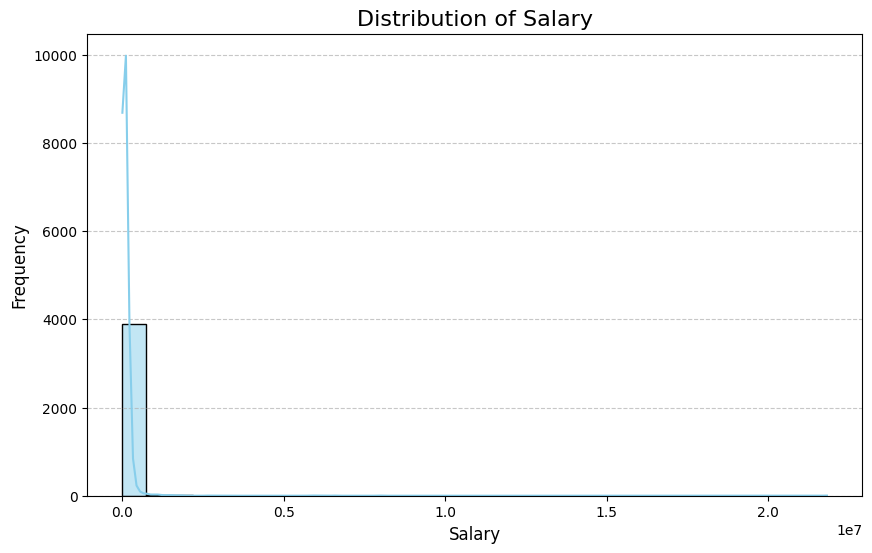

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ConvertedCompYearly'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:

data = data.rename(columns={'ConvertedCompYearly': 'Salary'})
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
if lower_bound < 12000:
    lower_bound = 12000

In [18]:
data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]


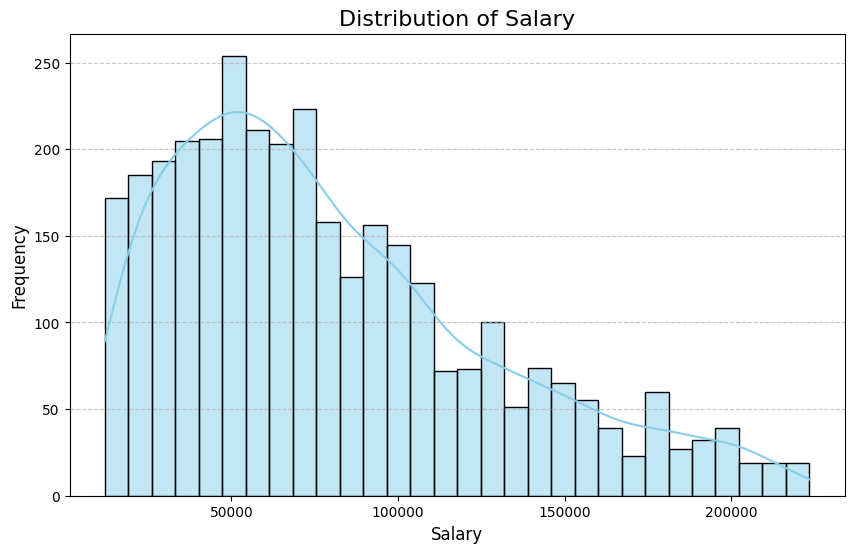

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\780036900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


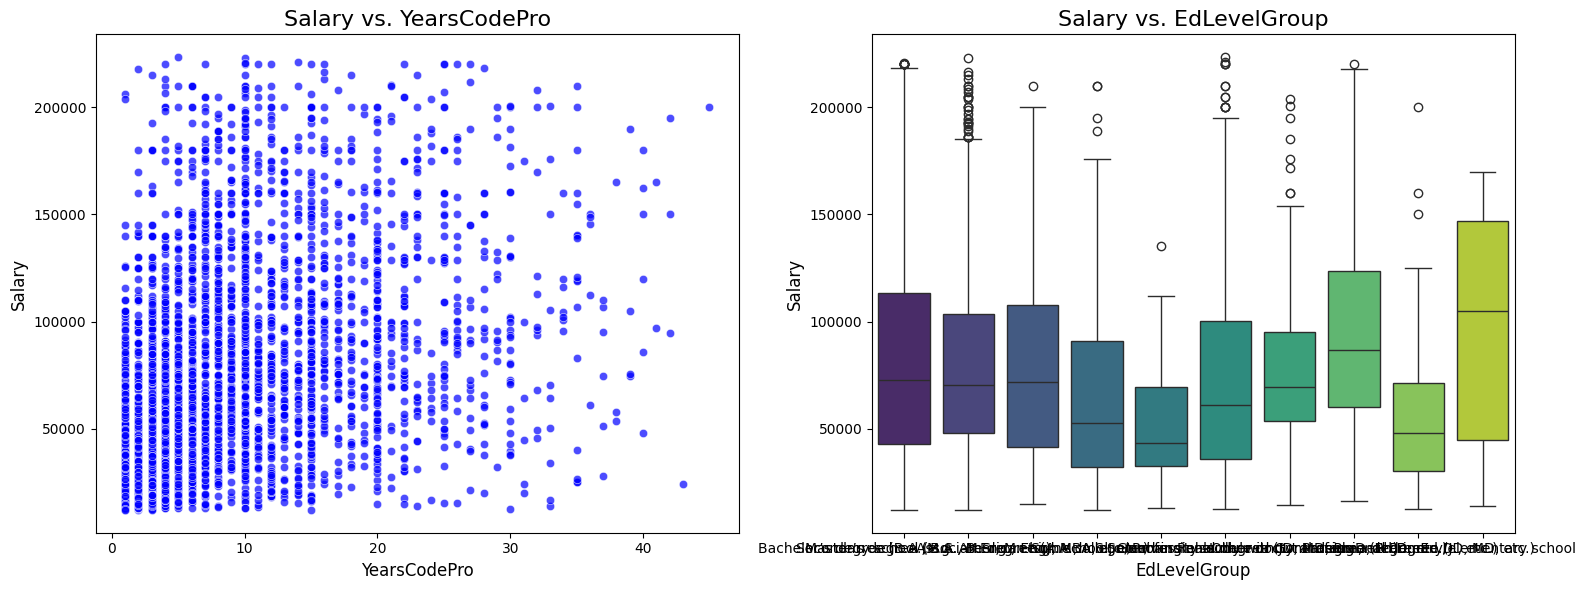

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)
sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [22]:

invalid_experience = (data['YearsCode'] > data['Age'] - 15) | \
                     (data['YearsCode'] < 0) | \
                     (data['YearsCode'] > 50)|\
                    (data['YearsCodePro'] > data['YearsCode'])

print(f"Số hàng bất hợp lý trong YearsCodePro: {invalid_experience.sum()}")
data = data[~invalid_experience]

Số hàng bất hợp lý trong YearsCodePro: 668


In [23]:
data['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object)

In [24]:
edlevel_map = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree',
    'Something else': 'Other',
    'Some college/university study without earning a degree': 'Some college',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
    'Professional degree (JD, MD, etc.)': 'Professional degree',
    'Primary/elementary school': 'Primary school'
}

# Thay thế các giá trị trong cột EdLevel bằng nhóm tương ứng
data['EdLevel'] = data['EdLevel'].map(edlevel_map)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\261024034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')


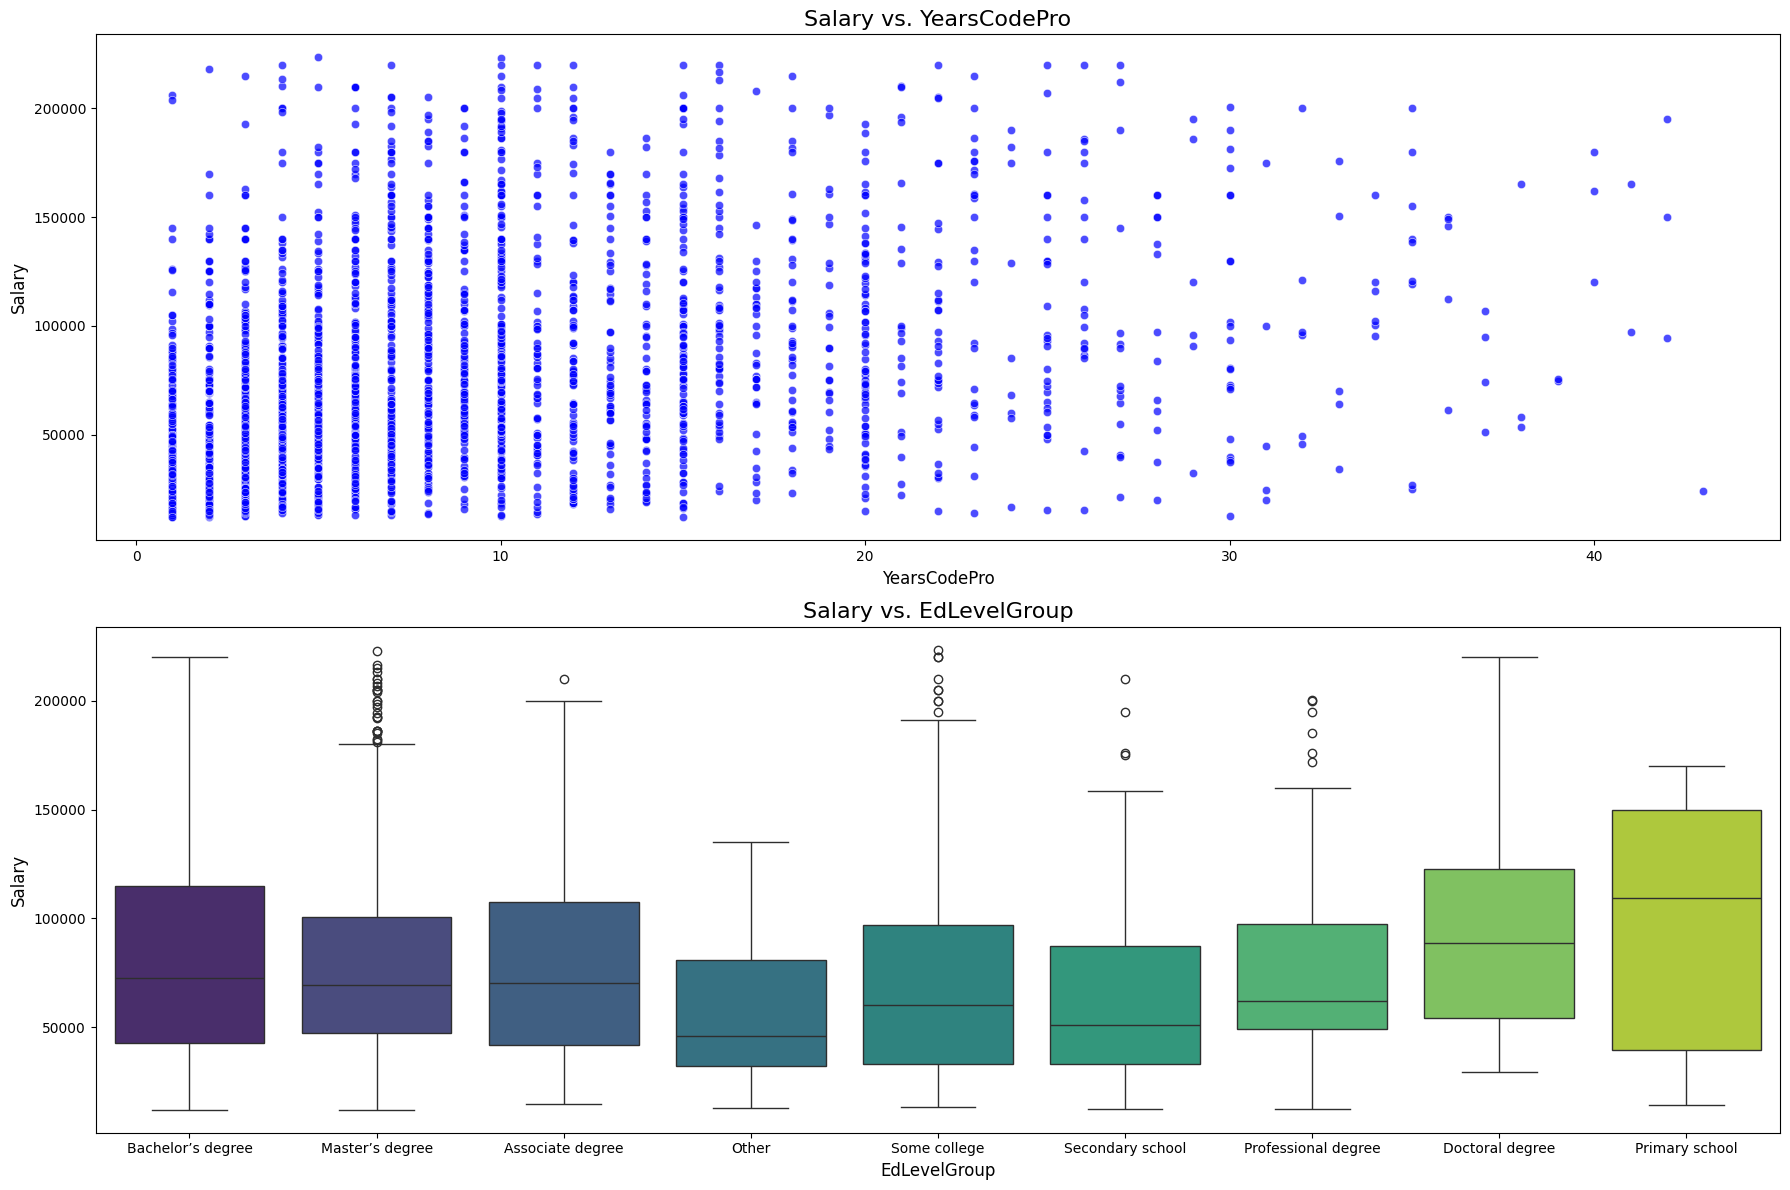

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(18, 12))  # Chỉnh số lượng hàng và cột
sns.scatterplot(x=data['YearsCodePro'], y=data['Salary'], ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Salary vs. YearsCodePro', fontsize=16)
axes[0].set_xlabel('YearsCodePro', fontsize=12)
axes[0].set_ylabel('Salary', fontsize=12)

sns.boxplot(x=data['EdLevel'], y=data['Salary'], ax=axes[1], palette='viridis')
axes[1].set_title('Salary vs. EdLevelGroup', fontsize=16)
axes[1].set_xlabel('EdLevelGroup', fontsize=12)
axes[1].set_ylabel('Salary', fontsize=12)

plt.tight_layout()
plt.show()


In [26]:
data['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Associate degree',
       'Other', 'Some college', 'Secondary school', 'Professional degree',
       'Doctoral degree', 'Primary school'], dtype=object)

Nhớ sửa phần này

In [27]:
primary_school_salary = data[data['EdLevel'] == 'Primary school']

# Xóa tất cả các giá trị lương lớn hơn 10,000 trong nhóm này
data = data[~((data['EdLevel'] == 'Primary school'))] # & (data['Salary'] > 120000))]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\1621175164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')


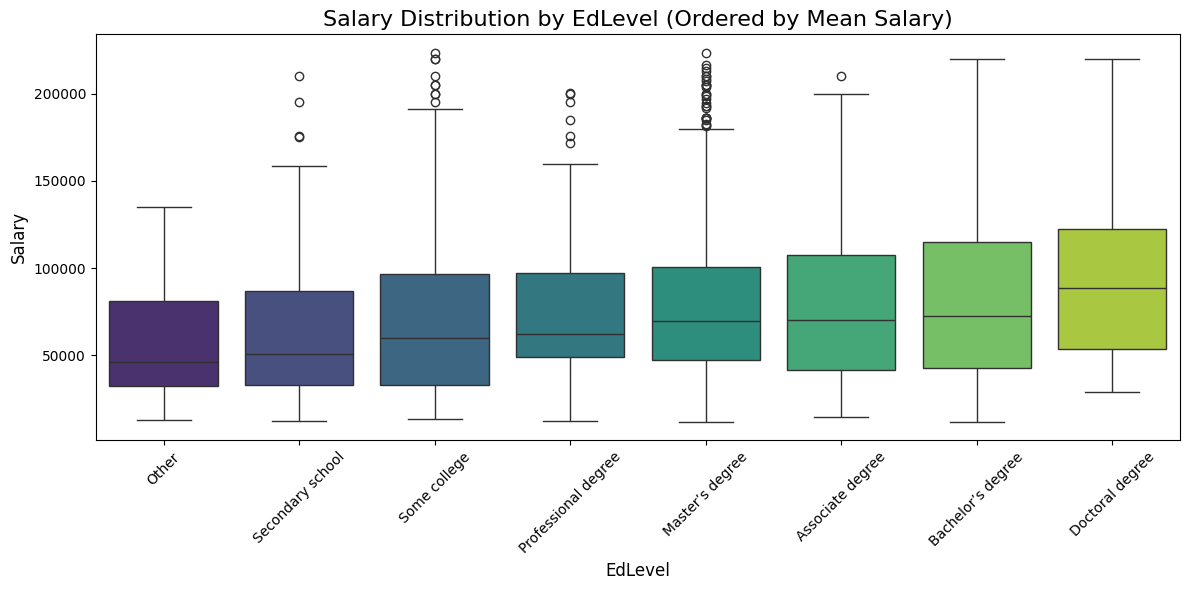

In [28]:
salary_by_edlevel = data.groupby('EdLevel')['Salary'].mean().sort_values()

# Vẽ biểu đồ boxplot với thứ tự các nhóm đã sắp xếp
plt.figure(figsize=(12, 6))
sns.boxplot(x='EdLevel', y='Salary', data=data, order=salary_by_edlevel.index, palette='viridis')
plt.title('Salary Distribution by EdLevel (Ordered by Mean Salary)', fontsize=16)
plt.xlabel('EdLevel', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
data['EdLevel'].value_counts()


EdLevel
Bachelor’s degree      1241
Master’s degree         742
Some college            299
Secondary school        114
Associate degree        102
Professional degree      84
Doctoral degree          38
Other                    27
Name: count, dtype: int64

In [30]:
# data[data['EdLevel'] == 'Primary school']['Salary']

In [31]:
# Kiểm tra các giá trị lương trong nhóm "Primary school"
# primary_school_salary = data[data['EdLevel'] == 'Primary school']['Salary']
# primary_school_salary.describe()


In [32]:
data['DevType'] = data['DevType'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['DevType'] = data['DevType'].str.split(";")

In [33]:
data['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2647, dtype: object

In [34]:
data['Employment']

0                                      Employed full-time
1                                     Employed, full-time
2                                      Employed full-time
3       Employed, full-time;Independent contractor, fr...
4                                     Employed, full-time
                              ...                        
3994                                  Employed, full-time
3995                                  Employed, full-time
3997                                   Employed full-time
3998                                  Employed, full-time
3999                                  Employed, full-time
Name: Employment, Length: 2647, dtype: object

In [35]:
data['Employment'] = data['Employment'].str.replace(",", "").str.strip()

# Bước 2: Nếu có dấu chấm phẩy, split thành danh sách
data['Employment'] = data['Employment'].str.split(";")

In [36]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\3121201441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")


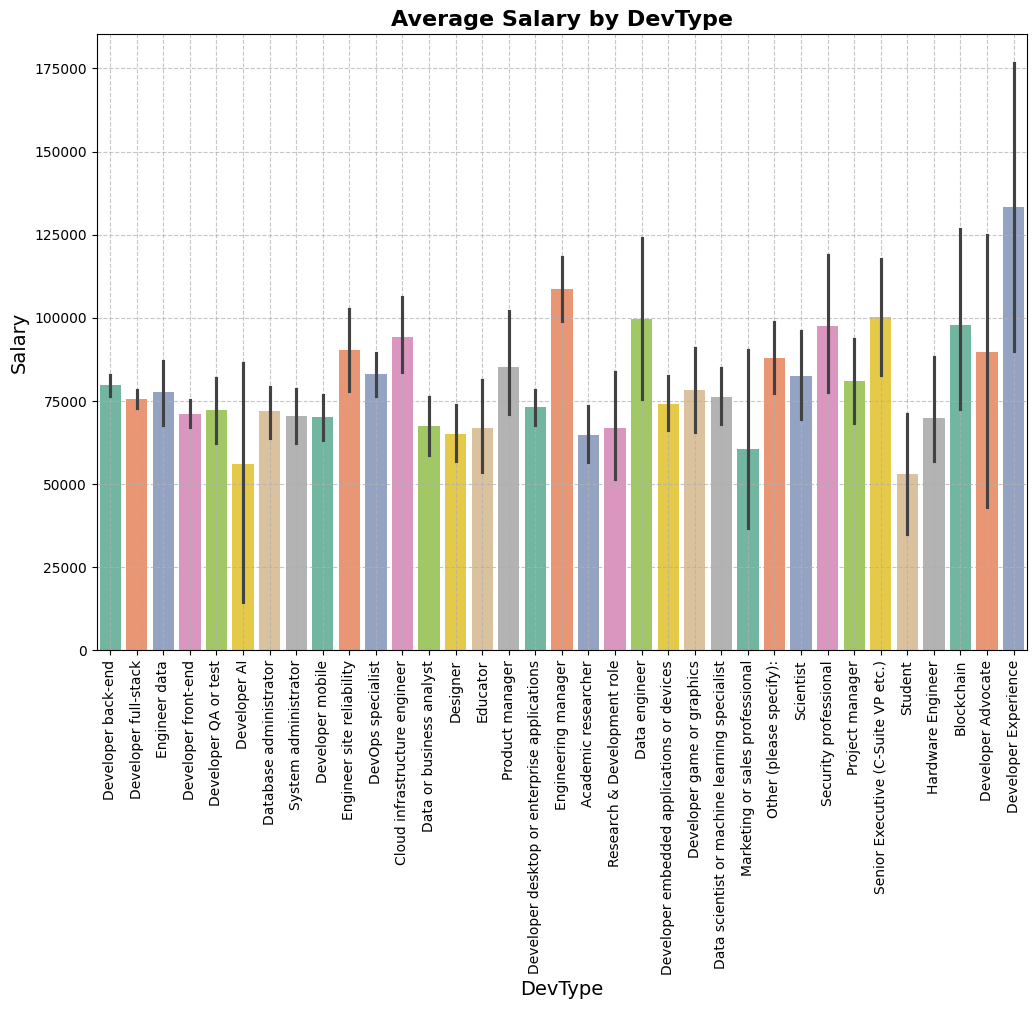

In [37]:
devtype_expanded = data.explode('DevType')
expanded_data = data.explode('DevType')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='DevType', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by DevType', fontsize=16, weight='bold')
plt.xlabel('DevType', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\2002881208.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")


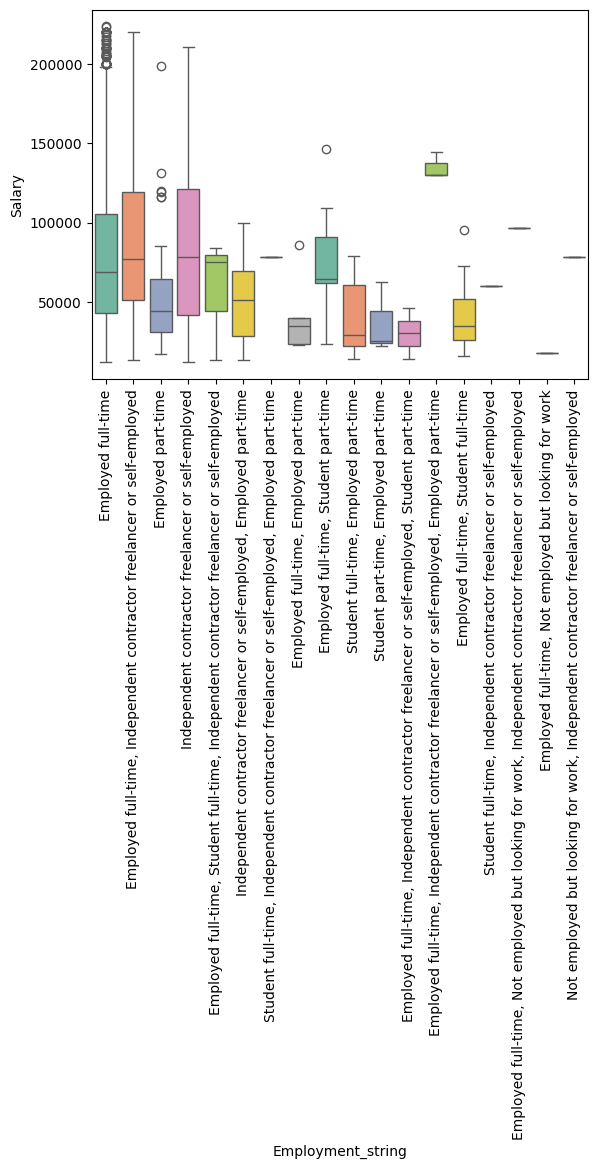

ANOVA result: F_onewayResult(statistic=3.127937544704401, pvalue=1.540167261454868e-05)


In [38]:
from scipy.stats import f_oneway

data['Employment_string'] = data['Employment'].apply(lambda x: ', '.join(x))
sns.boxplot(data=data, x='Employment_string', y='Salary', palette="Set2")
plt.xticks(rotation=90) 
plt.show()

anova_result = f_oneway(*[data['Salary'][data['Employment_string'] == group] for group in data['Employment_string'].unique()])
print('ANOVA result:', anova_result)
data = data.drop('Employment_string',axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\2829554354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


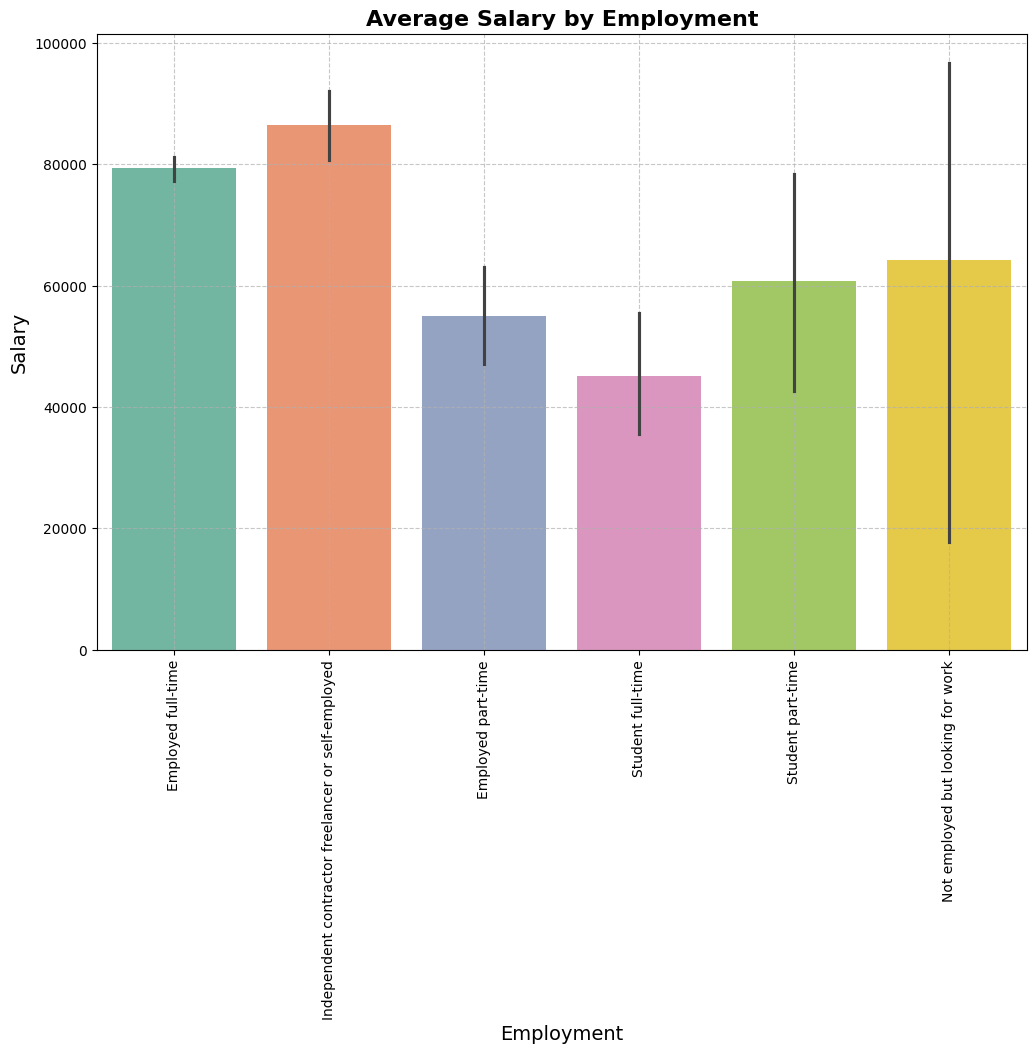

In [39]:

expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

Dữ liệu đang có vấn đề ....

In [40]:
data['Employment']

0                                    [Employed full-time]
1                                    [Employed full-time]
2                                    [Employed full-time]
3       [Employed full-time, Independent contractor fr...
4                                    [Employed full-time]
                              ...                        
3994                                 [Employed full-time]
3995                                 [Employed full-time]
3997                                 [Employed full-time]
3998                                 [Employed full-time]
3999                                 [Employed full-time]
Name: Employment, Length: 2647, dtype: object

In [41]:
data.drop(data[data['Employment'].apply(lambda x: "Not employed but looking for work" in x)].index, inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\310834881.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")


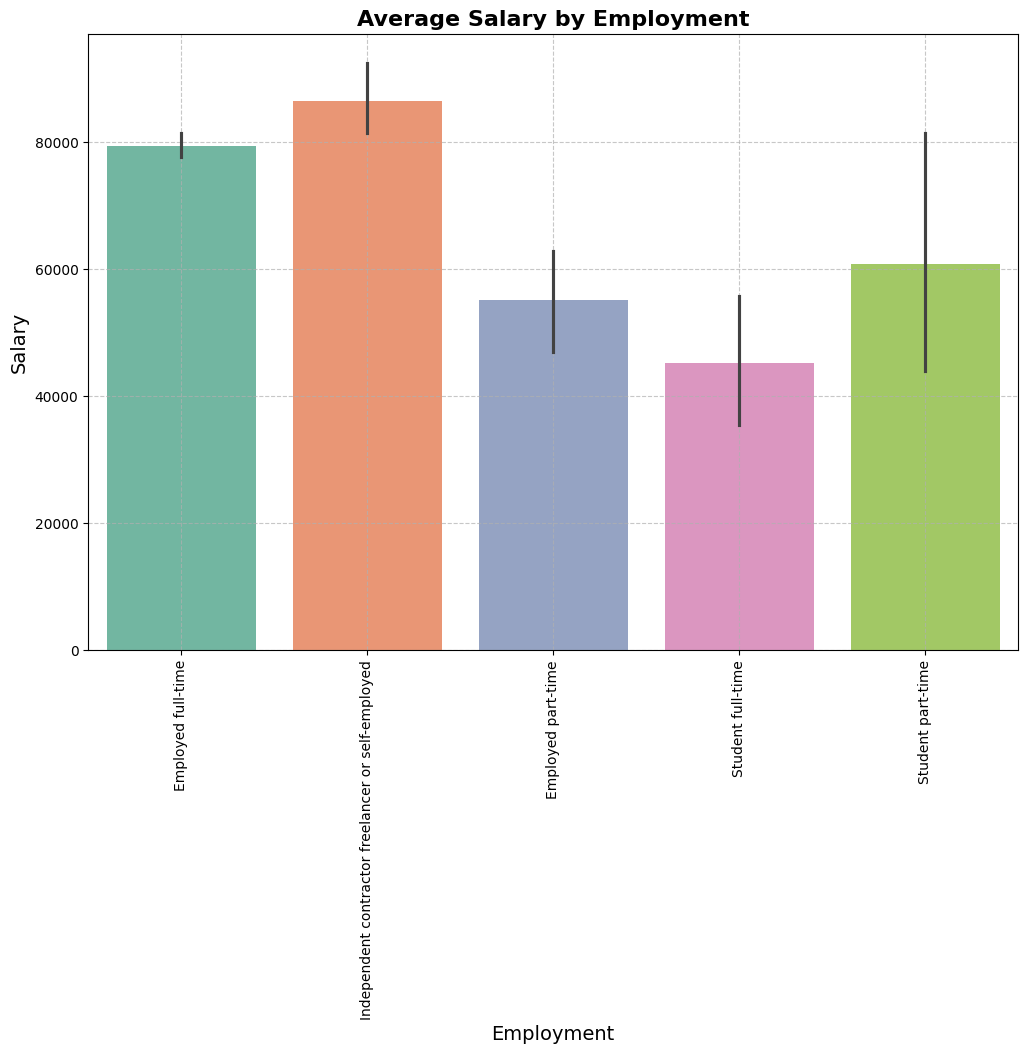

In [42]:
expanded_data = data.explode('Employment')

# Vẽ biểu đồ Barplot với lương trung bình cho mỗi DevType
plt.figure(figsize=(12, 8))

# Chọn bảng màu đẹp (ví dụ: "Set2")
sns.set_palette("Set2")

# Vẽ Barplot
sns.barplot(data=expanded_data, x='Employment', y='Salary', palette="Set2")

# Cải thiện trực quan
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.title('Average Salary by Employment', fontsize=16, weight='bold')
plt.xlabel('Employment', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Thêm lưới nhẹ cho dễ nhìn

# Hiển thị biểu đồ
plt.show()

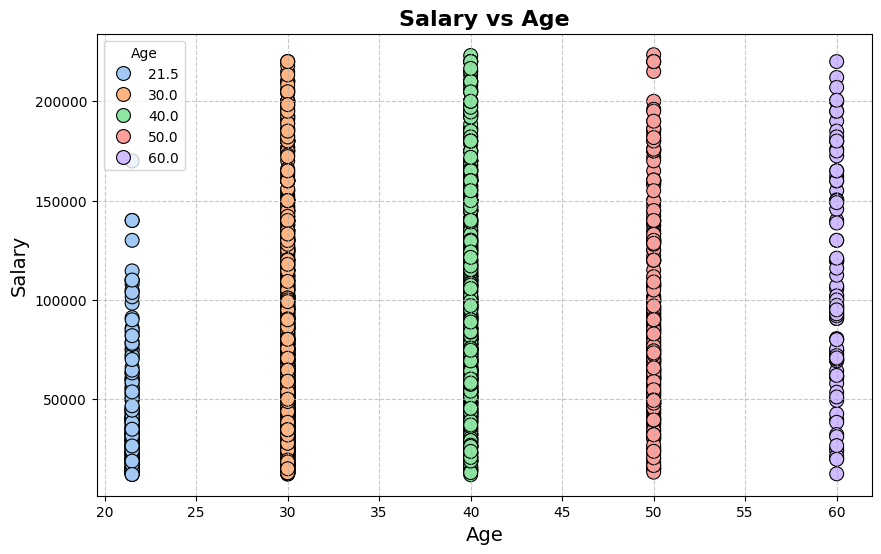

In [43]:
# Cải thiện trực quan của scatterplot
plt.figure(figsize=(10, 6))

# Sử dụng màu sắc nhẹ nhàng cho biểu đồ phân tán
sns.set_palette("pastel")

# Vẽ biểu đồ phân tán giữa Age và Salary
sns.scatterplot(data=data, x='Age', y='Salary', hue='Age', palette='pastel', s=100, edgecolor='black')

# Cải thiện tiêu đề và nhãn
plt.title('Salary vs Age', fontsize=16, weight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Hiển thị lưới nhẹ
plt.grid(True, linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

In [44]:
# Combine all relevant columns into a single 'skills' column
skills_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",
]

# Remove 'NaN' and combine lists while deduplicating
def combine_skills(row):
    combined = []
    for col in skills_columns:
        if pd.notna(row[col]):  # Check if the column is not NaN
            combined.extend(eval(row[col]))  # Convert string representation of lists to actual lists
    return list(set(combined))  # Remove duplicates

data["skills"] = data.apply(combine_skills, axis=1)

data


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,LanguageHaveWorkedWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,skills
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell', 'Go', 'Groovy', 'HTML/CSS', 'Ja...","['Redis', 'SQLite']",['IBM Cloud or Watson'],"['Flask', 'jQuery']","['Docker', 'Git', 'Kubernetes']","[HTML/CSS, Bash/Shell, Python, Docker, Kuberne..."
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"['Bash/Shell (all shells)', 'Groovy', 'HTML/CS...",['PostgreSQL'],['Amazon Web Services (AWS)'],"['Angular', 'Node.js']","['Docker', 'Gradle', 'Homebrew', 'Kubernetes',...","[Kubernetes, Bash/Shell (all shells), Groovy, ..."
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"['C', 'C++', 'Julia', 'Matlab', 'Python', 'Rus...",[],[],[],[],"[C, Python, Matlab, VBA, Rust, Julia, C++]"
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","['C#', 'GDScript', 'HTML/CSS', 'JavaScript', '...",['Microsoft SQL Server'],['Microsoft Azure'],"['ASP.NET', 'jQuery']","['Godot', 'MSBuild']","[HTML/CSS, GDScript, Visual Basic (.Net), Java..."
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],['Rust'],['PostgreSQL'],['Amazon Web Services (AWS)'],[],"['Cargo', 'npm']","[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"['Java', 'JavaScript', 'SQL']",['IBM DB2'],[],"['jQuery', 'Node.js', 'Vue.js']","['Docker', 'Homebrew', 'npm', 'Unity 3D']","[JavaScript, Docker, Unity 3D, Java, jQuery, V..."
3995,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"['HTML/CSS', 'JavaScript']",[],[],"['Node.js', 'Nuxt.js', 'Vue.js']","['Docker', 'npm', 'Yarn']","[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu..."
3997,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"['JavaScript', 'Kotlin', 'Node.js', 'Python', ...","['MongoDB', 'PostgreSQL']","['AWS', 'Microsoft Azure']","['jQuery', 'React.js']","['Docker', 'Git', 'Yarn']","[MongoDB, JavaScript, Python, PostgreSQL, Kotl..."
3998,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"['Bash/Shell (all shells)', 'Groovy', 'JavaScr...","['Elasticsearch', 'MongoDB', 'PostgreSQL', 'Re...",['Amazon Web Services (AWS)'],['Play Framework'],"['Docker', 'Homebrew', 'Kubernetes', 'npm', 'Y...","[MongoDB, Play Framework, JavaScript, Redis, P..."


MÔ HÌNH TUYẾN TÍNH: Logistic Regression, Linear Regression, SVM với kernel tuyến tính

In [45]:
data = data.drop(columns = ['LanguageHaveWorkedWith',"DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "ToolsTechHaveWorkedWith",
    "WebframeHaveWorkedWith",])

Mã hóa

In [46]:
df1 = data

In [47]:
df1['DevType']

0                                    [Developer back-end]
1                                  [Developer full-stack]
2                                         [Engineer data]
3                                  [Developer full-stack]
4                                    [Developer back-end]
                              ...                        
3994    [Developer front-end, Developer full-stack, De...
3995                                [Developer front-end]
3997    [Developer full-stack, Developer QA or test, D...
3998                                 [Developer back-end]
3999                               [Developer full-stack]
Name: DevType, Length: 2644, dtype: object

Mã hóa cho DevType

In [48]:
all_dev_types = set([dev for sublist in df1['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df1[dev_type] = df1['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [49]:
df1 

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Developer Advocate,...,Other (please specify):,Blockchain,Database administrator,Security professional,Engineer site reliability,Developer desktop or enterprise applications,Educator,Scientist,Developer Experience,Data engineer
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[HTML/CSS, Bash/Shell, Python, Docker, Kuberne...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Kubernetes, Bash/Shell (all shells), Groovy, ...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Python, Matlab, VBA, Rust, Julia, C++]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[HTML/CSS, GDScript, Visual Basic (.Net), Java...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[JavaScript, Docker, Unity 3D, Java, jQuery, V...",0,...,0,0,0,0,0,0,0,0,0,0
3995,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu...",0,...,0,0,0,0,0,0,0,0,0,0
3997,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[MongoDB, JavaScript, Python, PostgreSQL, Kotl...",0,...,0,0,0,0,0,0,0,0,0,0
3998,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[MongoDB, Play Framework, JavaScript, Redis, P...",0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df1 = df1.reset_index(drop=True)

Mã hóa EdLevelGroup

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['EdLevel']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['EdLevel']))

df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Developer Advocate,...,Developer Experience,Data engineer,EdLevel_Associate degree,EdLevel_Bachelor’s degree,EdLevel_Doctoral degree,EdLevel_Master’s degree,EdLevel_Other,EdLevel_Professional degree,EdLevel_Secondary school,EdLevel_Some college
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[HTML/CSS, Bash/Shell, Python, Docker, Kuberne...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Kubernetes, Bash/Shell (all shells), Groovy, ...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Python, Matlab, VBA, Rust, Julia, C++]",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[HTML/CSS, GDScript, Visual Basic (.Net), Java...",0,...,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv...",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[JavaScript, Docker, Unity 3D, Java, jQuery, V...",0,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu...",0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[MongoDB, JavaScript, Python, PostgreSQL, Kotl...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[MongoDB, Play Framework, JavaScript, Redis, P...",0,...,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Mã hóa cho Age (dữ liệu trung bình nhóm tuổi vd 18-24 21)

In [53]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Developer Advocate,...,EdLevel_Master’s degree,EdLevel_Other,EdLevel_Professional degree,EdLevel_Secondary school,EdLevel_Some college,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[HTML/CSS, Bash/Shell, Python, Docker, Kuberne...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Kubernetes, Bash/Shell (all shells), Groovy, ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Python, Matlab, VBA, Rust, Julia, C++]",0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[HTML/CSS, GDScript, Visual Basic (.Net), Java...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv...",0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[JavaScript, Docker, Unity 3D, Java, jQuery, V...",0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu...",0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[MongoDB, JavaScript, Python, PostgreSQL, Kotl...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[MongoDB, Play Framework, JavaScript, Redis, P...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [54]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df1[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df1 = pd.concat([df1, encoded_df], axis=1)

df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Developer Advocate,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[HTML/CSS, Bash/Shell, Python, Docker, Kuberne...",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[Kubernetes, Bash/Shell (all shells), Groovy, ...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Python, Matlab, VBA, Rust, Julia, C++]",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[HTML/CSS, GDScript, Visual Basic (.Net), Java...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[JavaScript, Docker, Unity 3D, Java, jQuery, V...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[MongoDB, JavaScript, Python, PostgreSQL, Kotl...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[MongoDB, Play Framework, JavaScript, Redis, P...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df1['Employment'] = df1['Employment'].apply(lambda x: str(x))  # Chuyển list thành string

# Lấy danh sách tất cả các cụm employment (gồm cả list gốc)
all_employment_types = set(df1['Employment'])
for employment_type in all_employment_types:
    df1[employment_type] = df1['Employment'].apply(lambda x: 1 if x == employment_type else 0)

In [56]:
df1

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,Developer Advocate,...,"['Employed full-time', 'Independent contractor freelancer or self-employed', 'Employed part-time']","['Student full-time', 'Independent contractor freelancer or self-employed', 'Employed part-time']","['Student full-time', 'Independent contractor freelancer or self-employed']","['Employed full-time', 'Student part-time']","['Employed full-time', 'Employed part-time']","['Employed full-time', 'Student full-time']","['Independent contractor freelancer or self-employed', 'Employed part-time']","['Employed full-time', 'Independent contractor freelancer or self-employed']","['Student full-time', 'Employed part-time']",['Employed full-time']
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],['Employed full-time'],"[HTML/CSS, Bash/Shell, Python, Docker, Kuberne...",0,...,0,0,0,0,0,0,0,0,0,1
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],['Employed full-time'],"[Kubernetes, Bash/Shell (all shells), Groovy, ...",0,...,0,0,0,0,0,0,0,0,0,1
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],['Employed full-time'],"[C, Python, Matlab, VBA, Rust, Julia, C++]",0,...,0,0,0,0,0,0,0,0,0,1
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"['Employed full-time', 'Independent contractor...","[HTML/CSS, GDScript, Visual Basic (.Net), Java...",0,...,0,0,0,0,0,0,0,1,0,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],['Employed full-time'],"[Cargo, PostgreSQL, npm, Rust, Amazon Web Serv...",0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",['Employed full-time'],"[JavaScript, Docker, Unity 3D, Java, jQuery, V...",0,...,0,0,0,0,0,0,0,0,0,1
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],['Employed full-time'],"[HTML/CSS, JavaScript, Docker, Vue.js, npm, Nu...",0,...,0,0,0,0,0,0,0,0,0,1
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",['Employed full-time'],"[MongoDB, JavaScript, Python, PostgreSQL, Kotl...",0,...,0,0,0,0,0,0,0,0,0,1
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],['Employed full-time'],"[MongoDB, Play Framework, JavaScript, Redis, P...",0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
all_skills = set([item for sublist in df1['skills'] for item in sublist])

for skill in all_skills:
    df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[skill] = df1['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16152\2545966735.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

In [58]:
df1 = df1.drop(columns = ['Country','Age','DevType','Employment','skills'])

In [59]:
df1

,Salary,YearsCode,YearsCodePro,EdLevel,Developer Advocate,Academic researcher,Product manager,DevOps specialist,Designer,Student,...,Podman,RavenDB,React.js,jQuery,Swift,Clojure,IBM Cloud or Watson,"Linode, now Akamai",Bun,Pacman
0,69804.0,20,13.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,144842.0,10,8.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,11,5.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,25,20.0,Associate degree,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,192761.0,25,15.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,18,12.0,Master’s degree,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2640,34692.0,6,5.0,Other,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,8,5.0,Bachelor’s degree,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
2642,121429.0,18,10.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Tính ma trận tương quan giữa các cột
# df1 = df1.drop('EdLevel',axis=1)
# correlation_matrix = df1.corr()

# # Tính độ tương quan trung bình cho từng mẫu dữ liệu (hàng)
# sample_correlation = df1.corrwith(df1.mean(axis=1), axis=1)

# # Chọn 80% mẫu có độ tương quan cao nhất
# num_samples = int(df1.shape[0] * 0.8)
# top_samples = sample_correlation.sort_values(ascending=False).head(num_samples).index
# filtered_df = df1.loc[top_samples]

# # Tính toán ma trận tương quan cho các cột trong mẫu đã chọn
# filtered_corr_matrix = filtered_df.corr()

# # Vẽ ma trận tương quan
# plt.figure(figsize=(16, 12))
# sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# # Tiêu đề
# plt.title("Correlation Matrix (Filtered 80% Samples with High Correlation)", fontsize=16)
# plt.show()


In [61]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df1.drop(columns=['EdLevel'])  
y = df1['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df1.iloc[train_idx]
    temp_data = df1.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [62]:
train_data

,Salary,YearsCode,YearsCodePro,EdLevel,Developer Advocate,Academic researcher,Product manager,DevOps specialist,Designer,Student,...,Podman,RavenDB,React.js,jQuery,Swift,Clojure,IBM Cloud or Watson,"Linode, now Akamai",Bun,Pacman
20,101311.0,15,5.0,Other,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
554,64499.0,30,23.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1373,80000.0,6,4.0,Associate degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1549,20363.0,15,9.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1524,58992.0,20,14.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,24288.0,12,7.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,25860.0,6,1.0,Some college,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
349,15036.0,10,7.0,Bachelor’s degree,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
311,57999.0,11,6.0,Master’s degree,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])


In [65]:
train_data = train_data.drop('EdLevel',axis=1)
val_data = val_data.drop('EdLevel',axis=1)
test_data = test_data.drop('EdLevel',axis=1)

In [66]:
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)

In [67]:
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

# PCA

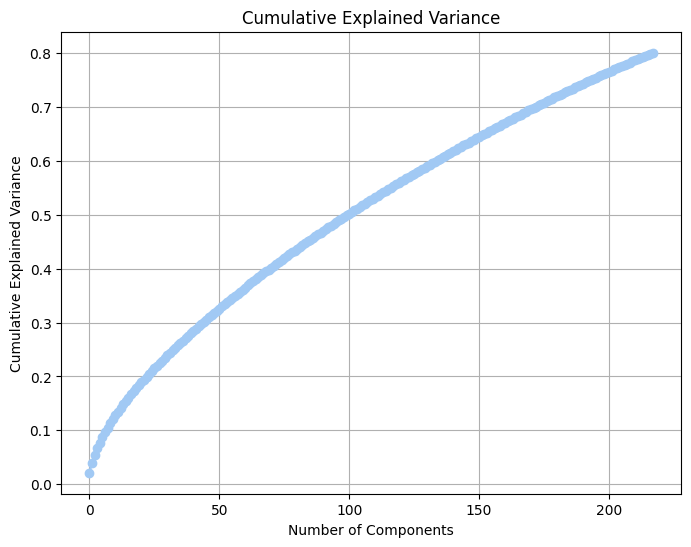

In [128]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Giả sử X_train đã được chuẩn bị
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Sử dụng cùng scaler đã fit trên X_train


# Áp dụng PCA
pca = PCA(n_components=0.8)  # Giảm xuống 2 chiều để dễ vẽ
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)  # Dùng PCA đã fit trên X_train để giảm chiều X_val

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# Mô hình

In [68]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Linear Regresion

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Linear Regression: {mae}')
print(f'RMSE of Linear Regression: {rmse}')
print(f'R^2 of Linear Regression: {r2}')


MAE of Linear Regression: 26257.700757575756
RMSE of Linear Regression: 33835.09294709616
R^2 of Linear Regression: 0.5289657414890767


Linear Regression + Bagging

In [70]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 18980698157273.836
RMSE: 207748520469413.9
R²: -1.775798259746199e+19


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LGBMRegressor

In [71]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=1300,learning_rate=0.05,max_depth=2,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 205
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


*pca tệ*

In [138]:
import lightgbm as lgb
X_train_temp = pd.DataFrame(X_train_pca)
X_val_temp = pd.DataFrame(X_val_pca)
X_train_temp.columns = [f'PC{i+1}' for i in range(X_train_temp.shape[1])]
X_val_temp.columns = [f'PC{i+1}' for i in range(X_val_temp.shape[1])]

lgb_model = lgb.LGBMRegressor(n_estimators=1500,learning_rate=0.05,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55590
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 218
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


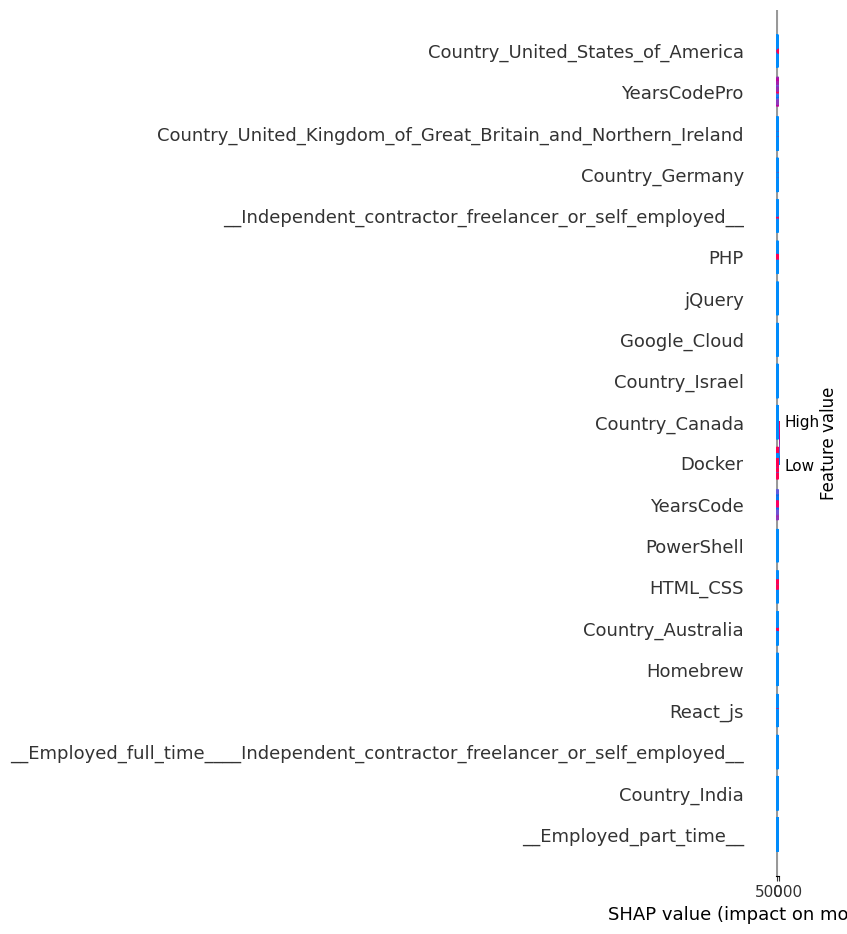

In [72]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


In [73]:
len(df1.columns)

388

In [117]:
# Tính toán giá trị SHAP trung bình

mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 40
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train.iloc[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


Important Features Index: 141


In [118]:
X_val_filtered = X_val.iloc[:,important_features]

In [123]:
import lightgbm as lgb
X_train_temp = X_train_filtered
X_val_temp = X_val_filtered
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators= 800,learning_rate=0.05,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 141
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<!-- import optuna
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 800),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 15, 127),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    }
    model = lgb.LGBMRegressor(**params, random_state=42)
    score = -cross_val_score(model, X_train_temp, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return np.sqrt(score) 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best RMSE:", study.best_value) -->


In [ ]:
# import lightgbm as lgb
# best_params = study.best_params
# best_model = lgb.LGBMRegressor(**best_params, random_state=42)
# best_model.fit(X_train_temp, y_train)

# y_pred = best_model.predict(X_val_temp)

# mae = mean_absolute_error(y_val, y_pred)
# rmse = mean_squared_error(y_val, y_pred, squared=False)
# r2 = r2_score(y_val, y_pred)

# print(f"MAE: {mae}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")


**SVM**

SVM với Linear kernel

In [ ]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')

svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_val)

# Đánh giá mô hình
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of SVM with Linear Kernel: {mae}')
print(f'RMSE of SVM with Linear Kernel: {rmse}')
print(f'R^2 of SVM with Linear Kernel: {r2}')


MAE of SVM with Linear Kernel: 39149.39817629235
RMSE of SVM with Linear Kernel: 51436.22209775621
R^2 of SVM with Linear Kernel: -0.08856877531613194


SVM với kernel rbf

In [ ]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


SVM, kernerl rbf và LR

In [ ]:
lr_model = LinearRegression()
svr_model = SVR(kernel='rbf', C=1500000, epsilon=0.03)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

SVM, kernel rbf và theo bagging

In [ ]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('gbm', gbm_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

**XGBoost**

XGB

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=700, learning_rate=0.05, max_depth=3)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('xgb', xgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGB + Random forest

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(
    colsample_bytree=0.5,
    learning_rate=0.01,
    max_depth=5,
    n_estimators=700,
    subsample=0.5,
    random_state=42
)

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=3,
    random_state=42
)

meta_model = Ridge(alpha=0.1)

stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf)
    ],
    final_estimator=meta_model
)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Trung bình theo trọng số cho XGB + GB

In [ ]:

weight_xgb = 0.8
weight_gb = 0.2

xgb.fit(X_train, y_train)
gb.fit(X_train, y_train)

y_pred_xgb = xgb_best.predict(X_val)
y_pred_gb = gb_model.predict(X_val)

y_pred_weighted = (weight_xgb * y_pred_xgb + weight_gb * y_pred_gb)

mae_weighted = mean_absolute_error(y_val, y_pred_weighted)
rmse_weighted = mean_squared_error(y_val, y_pred_weighted, squared=False)
r2_weighted = r2_score(y_val, y_pred_weighted)

print("Combined Model (Weighted Averaging):")
print(f"MAE: {mae_weighted}")
print(f"RMSE: {rmse_weighted}")
print(f"R²: {r2_weighted}")


**LGB**

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=700, learning_rate=0.05,max_depth=7, num_leaves=35)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('lgb', lgb_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

**CatBoost**

CatBoost

In [ ]:
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1200, learning_rate=0.05, depth=3, silent=True)
stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('svr', svr_model), ('catboost', catboost_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

CatBoost + LR

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

**Kết hợp nhiều hơn 2 mô hình**

XGB + LR + SVM (kernel linear)

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "linear", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGB + LR + SVM (kernel rbf)

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr)
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

XGB + Ridge LR + LGBM

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
}
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgb', lgb),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

In [ ]:
xgb = XGBRegressor(
    colsample_bytree = 0.5,
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 500,
    subsample = 0.5,
    random_state = 42
)
lr = LinearRegression()
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
dt = DecisionTreeRegressor(max_depth = 3, random_state = 42)
lgb = LGBMRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 5, random_state= 42)
catboost = CatBoostRegressor(n_estimators=500, learning_rate=0.01, depth=5, random_state=42, verbose=False)
meta_model = Ridge(alpha = 0.1)
stacking_regressor = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lr', lr),
        ('svr', svr),
        ('dt', dt),
        ('lgb', lgb),
        ('catboost', catboost),
    ],
    final_estimator=meta_model
)
stacking_regressor.fit(X_train, y_train)
y_pred = stacking_regressor.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=21)

ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f'MAE of Ridge Regression: {mae}')
print(f'RMSE of Ridge Regression: {rmse}')
print(f'R^2 of Ridge Regression: {r2}')


MAE of Ridge Regression: 24806.51980548542
RMSE of Ridge Regression: 31698.363588233107
R^2 of Ridge Regression: 0.586580048101681


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24390.1946404197
RMSE: 31178.012372451747
R²: 0.600041807454285


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
svr = SVR(kernel = "rbf", C =2500000, epsilon = 0.02)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24931.66895055179
RMSE: 32663.82187337689
R²: 0.5610129143598203


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import lightgbm as lgb
X_train_temp = X_train
X_val_temp = X_val
X_train_temp.columns = X_train_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_val_temp.columns = X_val_temp.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

lgb_model = lgb.LGBMRegressor(n_estimators=600,learning_rate=0.06,max_depth=3,random_state=42)

lgb_model.fit(X_train_temp, y_train)

y_pred_lgb = lgb_model.predict(X_val_temp)

mae_lgb = mean_absolute_error(y_val, y_pred_lgb)
rmse_lgb = mean_squared_error(y_val, y_pred_lgb, squared=False)
r2_lgb = r2_score(y_val, y_pred_lgb)

print(f"MAE: {mae_lgb}")
print(f"RMSE: {rmse_lgb}")
print(f"R²: {r2_lgb}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 488
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 205
[LightGBM] [Info] Start training from score 78779.734752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

NameError: name 'mean_absolute_error' is not defined

In [ ]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
import shap

explainer = shap.Explainer(lgb_model, X_train)
shap_values = explainer(X_val)
shap.summary_plot(shap_values, X_val)


NameError: name 'lgb_model' is not defined

In [ ]:
# Tính toán giá trị SHAP trung bình
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 7
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


NameError: name 'shap_values' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 26413.549242424244
RMSE: 34256.14586547673
R²: 0.5171694454133244


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Thêm các mô hình khác

In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 23349.140160998908
RMSE: 30096.401479371776
R²: 0.6273107291579916


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10,random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_val)

print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("R²:", r2_score(y_val, y_pred))


MAE: 27132.251481080937
RMSE: 34637.645724783884
R²: 0.5063552997264196


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=900, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 25035.924727804657
RMSE: 31998.507165680545
R²: 0.5787138496489639


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
svr = SVR(kernel = "rbf", C =2000000,epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24931.6697246031
RMSE: 32663.82195322037
R²: 0.5610129122136993


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import BaggingRegressor
lr = LinearRegression()
bagging_regressor = BaggingRegressor(estimator=lr, n_estimators=200, random_state=42)

bagging_regressor.fit(X_train, y_train)
y_pred = bagging_regressor.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 9411502961562.166
RMSE: 72561173440331.9
R²: -2.1663386185211136e+18


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-----------------------------------------------------------------------------------------------------------------------------------------

Mô hình dựa trên cây: Decision Tree, Random Forest, XGBoost, LightGBM

In [ ]:
df2 = data

Mã hóa

In [ ]:
df2 = df2.reset_index(drop=True)

In [ ]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Age']])
encoded_df = pd.DataFrame(encoded, columns=[f'Age_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,Other (please specify):,Developer embedded applications or devices,Cloud infrastructure engineer,Blockchain,Developer QA or test,Age_21.5,Age_30.0,Age_40.0,Age_50.0,Age_60.0
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[IBM Cloud or Watson, Scala, Go, HTML/CSS, jQu...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[HTML/CSS, Gradle, PostgreSQL, Homebrew, Maven...",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Rust, VBA, Python, Julia, Matlab, C++]",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[MSBuild, SQL, PowerShell, HTML/CSS, jQuery, M...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Rust, PostgreSQL, Cargo, npm, Amazon Web Serv...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[SQL, jQuery, Java, IBM DB2, Docker, Vue.js, H...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, Docker, Vue.js, Yarn, Nuxt.js, Java...",0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[React.js, jQuery, AWS, Microsoft Azure, Mongo...",0,...,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), SQL, Scala, Elastics...",0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded = encoder.fit_transform(df2[['Country']])
encoded_df = pd.DataFrame(encoded, columns=[f'Country_{col}' for col in encoder.categories_[0]])
df2 = pd.concat([df2, encoded_df], axis=1)

df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Zimbabwe
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[IBM Cloud or Watson, Scala, Go, HTML/CSS, jQu...",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[HTML/CSS, Gradle, PostgreSQL, Homebrew, Maven...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Rust, VBA, Python, Julia, Matlab, C++]",0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[MSBuild, SQL, PowerShell, HTML/CSS, jQuery, M...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Rust, PostgreSQL, Cargo, npm, Amazon Web Serv...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[SQL, jQuery, Java, IBM DB2, Docker, Vue.js, H...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, Docker, Vue.js, Yarn, Nuxt.js, Java...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[React.js, jQuery, AWS, Microsoft Azure, Mongo...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), SQL, Scala, Elastics...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2['Employment'].explode().unique()

array(['Employed full-time',
       'Independent contractor freelancer or self-employed',
       'Employed part-time', 'Student full-time', 'Student part-time'],
      dtype=object)

In [ ]:
all_dev_types = set([dev for sublist in df2['DevType'] for dev in sublist])

for dev_type in all_dev_types:
    df2[dev_type] = df2['DevType'].apply(lambda x: 1 if dev_type in x else 0)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Khởi tạo MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Mã hóa cột DevType
devtype_encoded = mlb.fit_transform(data['DevType'])
# Chuyển đổi kết quả thành DataFrame
devtype_encoded_df = pd.DataFrame(devtype_encoded, columns=mlb.classes_)

# Kết hợp vào dữ liệu gốc
df2 = pd.concat([df2, devtype_encoded_df], axis=1)

df2


,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,Bachelor’s degree,[Developer back-end],[Employed full-time],"[IBM Cloud or Watson, Scala, Go, HTML/CSS, jQu...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,Bachelor’s degree,[Developer full-stack],[Employed full-time],"[HTML/CSS, Gradle, PostgreSQL, Homebrew, Maven...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,Master’s degree,[Engineer data],[Employed full-time],"[C, Rust, VBA, Python, Julia, Matlab, C++]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,Associate degree,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[MSBuild, SQL, PowerShell, HTML/CSS, jQuery, M...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,Master’s degree,[Developer back-end],[Employed full-time],"[Rust, PostgreSQL, Cargo, npm, Amazon Web Serv...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,Master’s degree,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[SQL, jQuery, Java, IBM DB2, Docker, Vue.js, H...",0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,Other,[Developer front-end],[Employed full-time],"[HTML/CSS, Docker, Vue.js, Yarn, Nuxt.js, Java...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,Bachelor’s degree,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[React.js, jQuery, AWS, Microsoft Azure, Mongo...",0,...,0,0,0,0,0,0,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,Bachelor’s degree,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), SQL, Scala, Elastics...",0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2[df2['EdLevel'] == 'Secondary school']

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
52,49056.0,40.0,25,14.0,Germany,Secondary school,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[HTML/CSS, jQuery, Unreal Engine, MySQL, Mongo...",0,...,0,0,0,0,0,0,0,0,0,0
65,20407.0,30.0,7,2.0,Italy,Secondary school,[Developer back-end],[Employed full-time],"[PHP, BigQuery, WordPress, Next.js, Databricks...",0,...,0,0,0,0,0,0,0,0,0,0
78,80555.0,30.0,10,8.0,Germany,Secondary school,[Developer full-stack],[Employed full-time],"[HTML/CSS, jQuery, Gradle, PostgreSQL, Maven (...",0,...,0,0,0,0,0,0,0,0,0,0
109,36000.0,30.0,13,13.0,United Kingdom of Great Britain and Northern I...,Secondary school,[Developer full-stack],[Employed full-time],"[HTML/CSS, jQuery, Bun, Homebrew, NuGet, Power...",0,...,0,0,0,0,0,0,0,0,0,0
125,40944.0,30.0,1,1.0,Czech Republic,Secondary school,[Developer QA or test],[Independent contractor freelancer or self-emp...,"[MySQL, React, Docker, Kubernetes, Yarn, Homeb...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,23803.0,30.0,11,4.0,Viet Nam,Secondary school,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[PowerShell, React.js, DigitalOcean, ASP.NET C...",0,...,0,0,0,0,0,0,0,0,0,0
2504,38916.0,40.0,25,20.0,Germany,Secondary school,"[Developer full-stack, Developer QA or test]",[Employed full-time],"[SQL, HTML/CSS, PowerShell, jQuery, Microsoft ...",0,...,0,0,0,0,0,0,0,0,0,0
2552,50481.0,21.5,6,4.0,Germany,Secondary school,[Developer full-stack],[Employed full-time],"[Svelte, FastAPI, HTML/CSS, pnpm, Bun, Postgre...",0,...,0,0,0,0,0,0,0,0,0,0
2623,42836.0,30.0,6,3.0,Germany,Secondary school,[Developer back-end],[Employed full-time],"[MySQL, SQL, PHP, HTML/CSS, Elasticsearch, Dig...",0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

from sklearn.preprocessing import OrdinalEncoder

# Áp dụng OrdinalEncoder với thứ tự mới
df2['EdLevel'] = OrdinalEncoder(categories=[[
    'Other',
    'Some college',
    'Secondary school',
    'Professional degree',
    'Master’s degree',
    'Associate degree',
    'Bachelor’s degree',
    'Doctoral degree'
]]).fit_transform(df2[['EdLevel']])



In [ ]:
df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,Marketing or sales professional,Other (please specify):,Product manager,Project manager,Research & Development role,Scientist,Security professional,Senior Executive (C-Suite VP etc.),Student,System administrator
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,6.0,[Developer back-end],[Employed full-time],"[IBM Cloud or Watson, Scala, Go, HTML/CSS, jQu...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,6.0,[Developer full-stack],[Employed full-time],"[HTML/CSS, Gradle, PostgreSQL, Homebrew, Maven...",0,...,0,0,0,0,0,0,0,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,4.0,[Engineer data],[Employed full-time],"[C, Rust, VBA, Python, Julia, Matlab, C++]",0,...,0,0,0,0,0,0,0,0,0,0
3,40814.0,40.0,25,20.0,Germany,5.0,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[MSBuild, SQL, PowerShell, HTML/CSS, jQuery, M...",0,...,0,0,0,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,4.0,[Developer back-end],[Employed full-time],"[Rust, PostgreSQL, Cargo, npm, Amazon Web Serv...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,4.0,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[SQL, jQuery, Java, IBM DB2, Docker, Vue.js, H...",0,...,0,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,0.0,[Developer front-end],[Employed full-time],"[HTML/CSS, Docker, Vue.js, Yarn, Nuxt.js, Java...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,6.0,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[React.js, jQuery, AWS, Microsoft Azure, Mongo...",0,...,0,0,0,0,0,0,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,6.0,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), SQL, Scala, Elastics...",0,...,0,0,0,0,0,0,0,0,0,0


Giả sử độ quan trọng của các skills là khác nhau

In [ ]:
all_skills = set([item for sublist in df2['skills'] for item in sublist])

for skill in all_skills:
    df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[skill] = df2['skills'].apply(lambda x: 1 if skill in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\977187315.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

In [ ]:
df2

,Salary,Age,YearsCode,YearsCodePro,Country,EdLevel,DevType,Employment,skills,System administrator,...,IBM DB2,LLVM's Clang,Godot,OpenShift,Databricks,IBM Cloud Or Watson,Angular,Matlab,Clojure,OpenStack
0,69804.0,40.0,20,13.0,United Kingdom of Great Britain and Northern I...,6.0,[Developer back-end],[Employed full-time],"[IBM Cloud or Watson, Scala, Go, HTML/CSS, jQu...",0,...,0,0,0,0,0,0,0,0,0,0
1,144842.0,30.0,10,8.0,Switzerland,6.0,[Developer full-stack],[Employed full-time],"[HTML/CSS, Gradle, PostgreSQL, Homebrew, Maven...",0,...,0,0,0,0,0,0,1,0,0,0
2,41363.0,30.0,11,5.0,United Kingdom of Great Britain and Northern I...,4.0,[Engineer data],[Employed full-time],"[C, Rust, VBA, Python, Julia, Matlab, C++]",0,...,0,0,0,0,0,0,0,1,0,0
3,40814.0,40.0,25,20.0,Germany,5.0,[Developer full-stack],"[Employed full-time, Independent contractor fr...","[MSBuild, SQL, PowerShell, HTML/CSS, jQuery, M...",0,...,0,0,1,0,0,0,0,0,0,0
4,192761.0,40.0,25,15.0,Serbia,4.0,[Developer back-end],[Employed full-time],"[Rust, PostgreSQL, Cargo, npm, Amazon Web Serv...",0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,74651.0,40.0,18,12.0,Germany,4.0,"[Developer front-end, Developer full-stack, De...",[Employed full-time],"[SQL, jQuery, Java, IBM DB2, Docker, Vue.js, H...",0,...,1,0,0,0,0,0,0,0,0,0
2640,34692.0,30.0,6,5.0,Poland,0.0,[Developer front-end],[Employed full-time],"[HTML/CSS, Docker, Vue.js, Yarn, Nuxt.js, Java...",0,...,0,0,0,0,0,0,0,0,0,0
2641,80172.0,30.0,8,5.0,Australia,6.0,"[Developer full-stack, Developer QA or test, D...",[Employed full-time],"[React.js, jQuery, AWS, Microsoft Azure, Mongo...",0,...,0,0,0,0,0,0,0,0,0,0
2642,121429.0,40.0,18,10.0,Israel,6.0,[Developer back-end],[Employed full-time],"[Bash/Shell (all shells), SQL, Scala, Elastics...",0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
all_employment_types = set([item for sublist in df2['Employment'] for item in sublist])

for employment_type in all_employment_types:
    df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[employment_type] = df2['Employment'].apply(lambda x: 1 if employment_type in x else 0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\3202328553.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [ ]:
df2 = df2.drop(columns = ['Country','Age','DevType','Employment'])

In [ ]:
df2 = df2.drop('skills',axis=1)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df2.drop(columns=['EdLevel'])  
y = df2['EdLevel'] 

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, temp_idx in splitter.split(X, y):
    train_data = df2.iloc[train_idx]
    temp_data = df2.iloc[temp_idx]

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in splitter.split(temp_data.drop(columns=['EdLevel']), temp_data['EdLevel']):
    val_data = temp_data.iloc[val_idx]
    test_data = temp_data.iloc[test_idx]

print(f"Kích thước train: {len(train_data)}")
print(f"Kích thước val: {len(val_data)}")
print(f"Kích thước test: {len(test_data)}")


Kích thước train: 2115
Kích thước val: 264
Kích thước test: 265


In [ ]:
train_data

,Salary,YearsCode,YearsCodePro,EdLevel,System administrator,Educator,Developer desktop or enterprise applications,Senior Executive (C-Suite VP etc.),Student,Developer AI,...,IBM Cloud Or Watson,Angular,Matlab,Clojure,OpenStack,Independent contractor freelancer or self-employed,Employed part-time,Student full-time,Employed full-time,Student part-time
2286,182052.0,5,5.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1067,48190.0,9,4.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
779,46899.0,13,8.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2163,31324.0,4,4.0,6.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1297,23215.0,11,7.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,70888.0,13,5.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,58167.0,10,7.0,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
111,69608.0,10,8.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
92,51403.0,5,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[['YearsCodePro']] = scaler.fit_transform(train_data[['YearsCodePro']])
val_data[['YearsCodePro']] = scaler.transform(val_data[['YearsCodePro']])
test_data[['YearsCodePro']] = scaler.transform(test_data[['YearsCodePro']])

train_data[['YearsCode']] = scaler.fit_transform(train_data[['YearsCode']])
val_data[['YearsCode']] = scaler.transform(val_data[['YearsCode']])
test_data[['YearsCode']] = scaler.transform(test_data[['YearsCode']])
X_train = train_data.drop('Salary',axis=1)
X_val = val_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)
y_train = train_data['Salary']
y_val = val_data['Salary']
y_test = test_data['Salary']

In [ ]:
X_train

,YearsCode,YearsCodePro,EdLevel,System administrator,Educator,Developer desktop or enterprise applications,Senior Executive (C-Suite VP etc.),Student,Developer AI,Data scientist or machine learning specialist,...,IBM Cloud Or Watson,Angular,Matlab,Clojure,OpenStack,Independent contractor freelancer or self-employed,Employed part-time,Student full-time,Employed full-time,Student part-time
0,-1.036594,-0.587333,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.561252,-0.721293,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.085910,-0.185454,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-1.155429,-0.721293,6.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.323581,-0.319414,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,-0.085910,-0.587333,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2111,-0.442416,-0.319414,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2112,-0.442416,-0.185454,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2113,-1.036594,-1.123173,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
numeric_columns = df2.select_dtypes(include=['string'])

In [ ]:
numeric_columns

""
0
1
2
3
4
...
2639
2640
2641
2642


In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

YearsCode                                             0
YearsCodePro                                          0
EdLevel                                               0
System administrator                                  0
Educator                                              0
                                                     ..
Independent contractor freelancer or self-employed    0
Employed part-time                                    0
Student full-time                                     0
Employed full-time                                    0
Student part-time                                     0
Length: 404, dtype: int64
0


In [ ]:
X_train = X_train.values  # Chuyển đổi DataFrame thành numpy array
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=900, learning_rate=0.05, max_depth=3)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24745.92197117661
RMSE: 34475.76697764855
R²: 0.5323091527371326


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


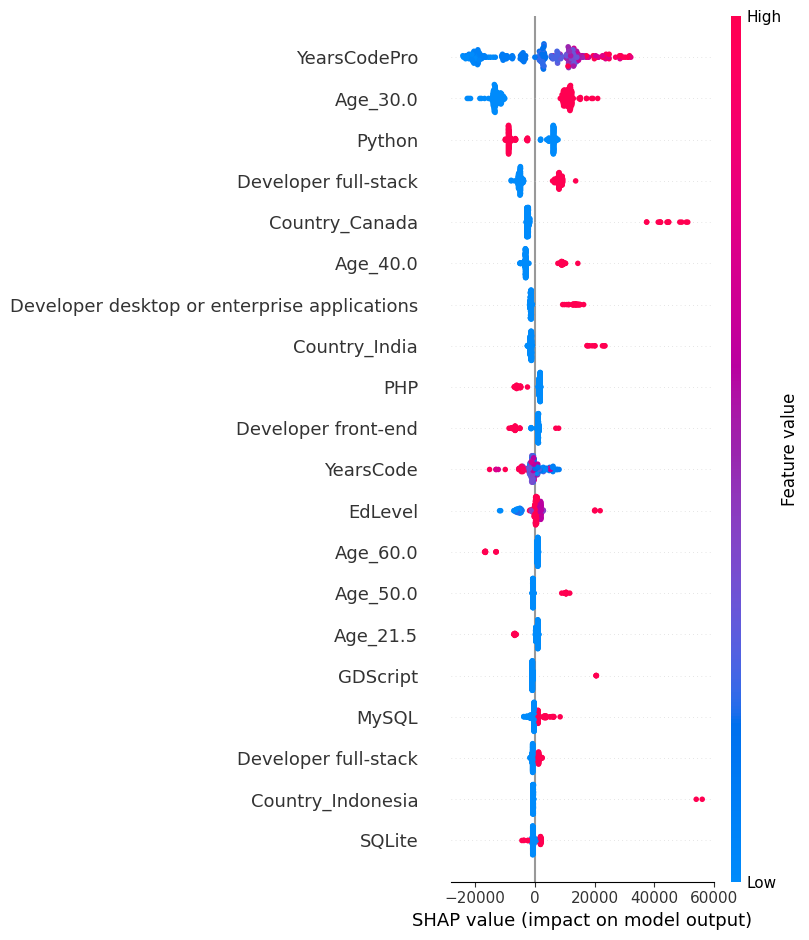

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
# Tính toán giá trị SHAP trung bình
mean_shap_values = np.abs(shap_values.values).mean(axis=0)

# Xác định đặc trưng quan trọng (có thể thay đổi threshold tùy theo yêu cầu)
threshold = 7
important_features = np.where(mean_shap_values > threshold)[0]

# Chỉ giữ lại các đặc trưng quan trọng
X_train_filtered = X_train[:, important_features]

# Hiển thị các đặc trưng quan trọng
print("Important Features Index:", len(important_features))


Important Features Index: 139


In [ ]:
X_val_filtered = X_val[:, important_features]

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=1200, learning_rate=0.03, max_depth=3)

xgb_model.fit(X_train_filtered, y_train)
y_pred = xgb_model.predict(X_val_filtered)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 25007.068814364346
RMSE: 34548.03371661358
R²: 0.5303463876489023


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
from xgboost import XGBRegressor
xgb_best = XGBRegressor(
    colsample_bytree=0.9,
    learning_rate=0.01,
    max_depth=8,
    n_estimators=1000,
    subsample=0.5,
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 24291.02891586766
RMSE: 33648.12237248619
R²: 0.5544949132659845


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
svr = SVR(kernel = "rbf", C =2000000, epsilon = 0.05)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 27928.25822826325
RMSE: 37539.6031662362
R²: 0.44548876195390774


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import catboost as cb
lr_model = LinearRegression()
cb_model = cb.CatBoostRegressor(learning_rate=0.05, iterations=1000, depth=3, silent=True)

stacking_model = StackingRegressor(
    estimators=[('lr', lr_model), ('catboost', cb_model)],
    final_estimator=LinearRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 24479.88922384493
RMSE: 33899.273283703085
R²: 0.5478195582951599


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
svr = SVR(kernel = "rbf", C =100000, epsilon = 0.01)
bagging_svr = BaggingRegressor(
    estimator=svr,    
    n_estimators=300,       
    max_samples=0.8,       
    max_features=0.8,      
    random_state=42,
    n_jobs=-1              
)

bagging_svr.fit(X_train, y_train)

y_pred = bagging_svr.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 25722.880766917795
RMSE: 35157.880514266486
R²: 0.5136192599370543


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
